Final Plots

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#supress scientific notation (show full number)
pd.options.display.float_format = '{:.0f}'.format

In [2]:
mlb_dataset = pd.read_csv(r'cleansed_data\atten_wins_payroll.csv')

In [3]:
#create cost per win column
mlb_dataset['Cost Per Win'] = mlb_dataset['Total Payroll'] / mlb_dataset['Wins'].astype(int)
#create cost per fan column
mlb_dataset['Cost Per Fan'] = mlb_dataset['Total Payroll'] / mlb_dataset['Attendance'].astype(int)

mlb_dataset.head()

,Year,Team,Games Played,Total Payroll,Wins,Attendance,Avg Att,Cost Per Win,Cost Per Fan
0,2023,Arizona Diamondbacks,162,112763571,84,1961182,24212,1342423,57
1,2022,Arizona Diamondbacks,162,75993333,74,1605199,19817,1026937,47
2,2021,Arizona Diamondbacks,162,89077233,52,1043010,12876,1713024,85
3,2023,Atlanta Braves,162,199727500,104,3191505,39401,1920457,63
4,2022,Atlanta Braves,162,173935000,101,3129931,38641,1722129,56


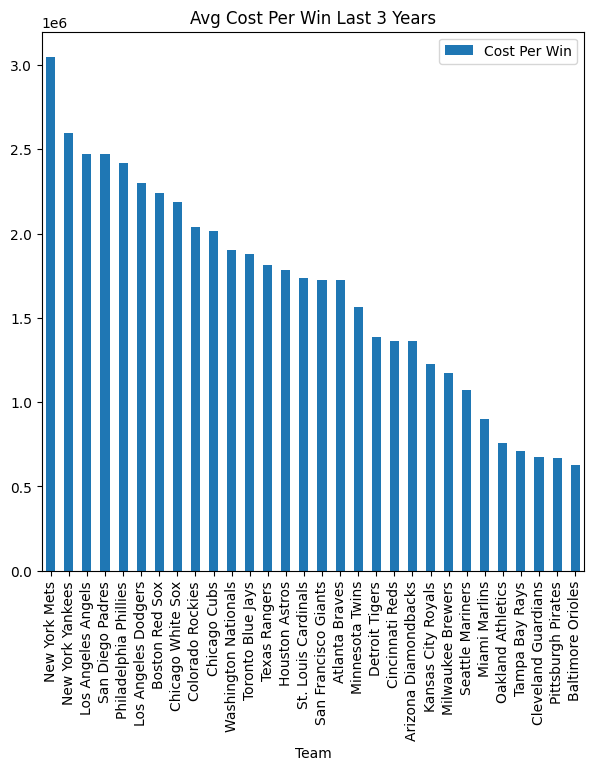

In [4]:
avg_cost_per_win = mlb_dataset.groupby(['Team'])['Cost Per Win'].mean()
avg_cost_per_win = avg_cost_per_win.to_frame()
avg_cost_per_win.sort_values(by='Cost Per Win',ascending=False, inplace=True)

plot_avg_cost = avg_cost_per_win.plot(kind='bar', title='Avg Cost Per Win Last 3 Years', figsize=(7, 7), legend=True, fontsize=10, align='center')

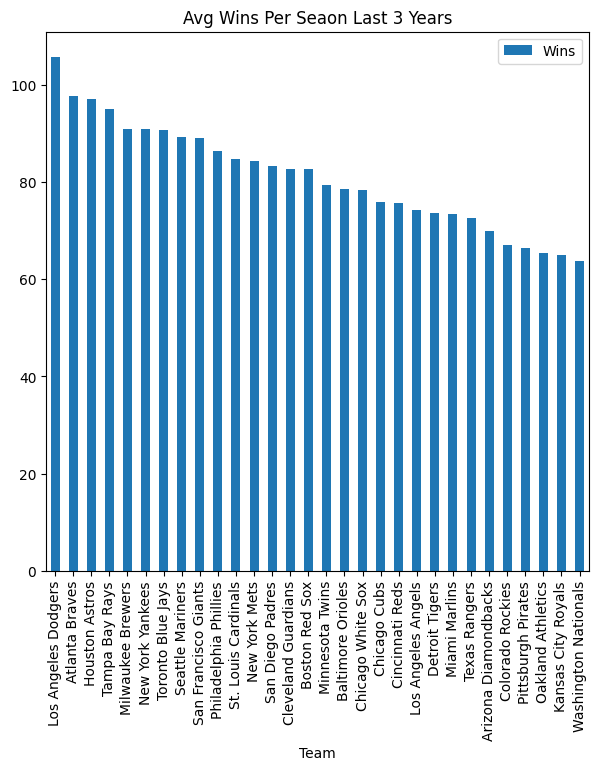

In [5]:
avg_wins_3seasons = mlb_dataset.groupby(['Team'])['Wins'].mean()
avg_wins_3seasons = avg_wins_3seasons.to_frame()
avg_wins_3seasons.sort_values(by='Wins',ascending=False, inplace=True)

plot_avg_wins = avg_wins_3seasons.plot(kind='bar', title='Avg Wins Per Seaon Last 3 Years', figsize=(7, 7), legend=True, fontsize=10, align='center')

<Axes: xlabel='Team'>

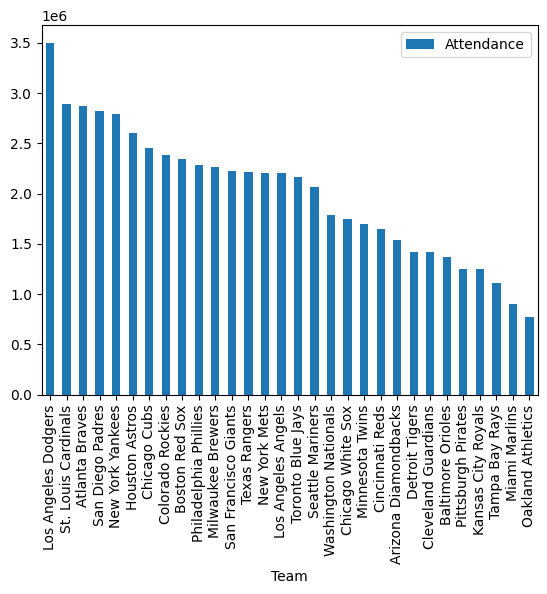

In [6]:
mlb_attendance = mlb_dataset.groupby(['Team'])['Attendance'].mean()
mlb_attendance = mlb_attendance.to_frame()
mlb_attendance.sort_values(by='Attendance', ascending=False, inplace=True)

mlb_attendance.plot.bar()

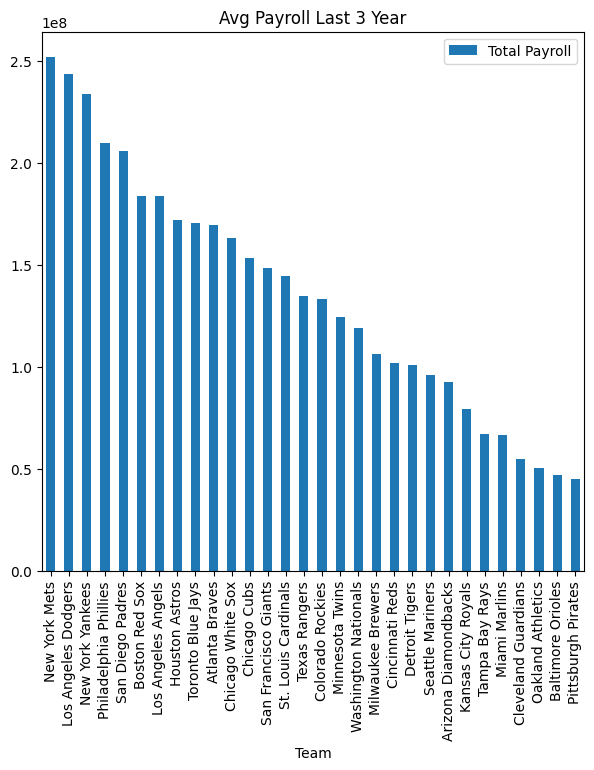

In [7]:
top_payroll = mlb_dataset.groupby(['Team'])['Total Payroll'].mean()
top_payroll = top_payroll.to_frame()
top_payroll.sort_values(by='Total Payroll',ascending=False, inplace=True)

plot_top_payroll = top_payroll.plot(kind='bar', title='Avg Payroll Last 3 Year', figsize=(7, 7), legend=True, fontsize=10, align='center')

In [8]:
top_payroll = top_payroll['Total Payroll'].nlargest(30)
top_mlb_attendance = mlb_attendance['Attendance'].nlargest(30)
top_avg_wins_3seasons = avg_wins_3seasons['Wins'].nlargest(30)

top_payroll = top_payroll.to_frame()
top_mlb_attendnace = top_mlb_attendance.to_frame()
top_avg_wins_3seasons = top_avg_wins_3seasons.to_frame()


top_teams = top_avg_wins_3seasons.merge(top_payroll, on='Team').merge(top_mlb_attendnace, on="Team")

top_teams


,Wins,Total Payroll,Attendance
Team,,,
Los Angeles Dodgers,106,243617948,3501060
Atlanta Braves,98,169373978,2873894
Houston Astros,97,171948833,2603285
Tampa Bay Rays,95,66796441,1109833
Milwaukee Brewers,91,106165151,2262673
New York Yankees,91,233483464,2788359
Toronto Blue Jays,91,170295005,2161764
Seattle Mariners,89,95704420,2064557
San Francisco Giants,89,148590801,2220774


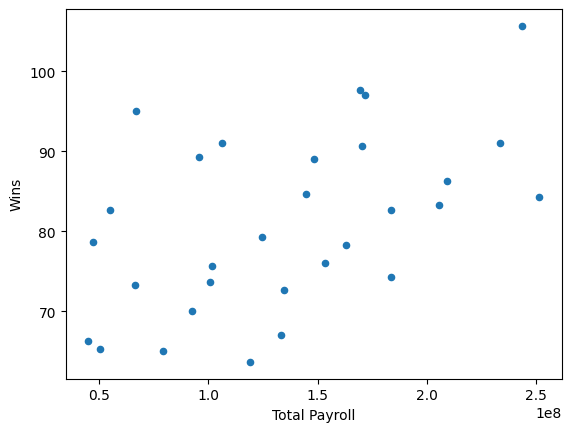

In [9]:
top_teams.plot(kind='scatter', x='Total Payroll', y='Wins')
plt.show()